<span style="font-family:Papyrus; font-size:2.5em;">Generative Adversarial Networks (GANs)</span>
---
![](https://espresso-jobs.com/conseils-carriere/wp-content/uploads/2019/05/monalisa.gif)
<br>

# Introduction

- Generative Adversarial Networks (GANs)
- How GANs Work
- GANs Process
- Examples

### Generative Adversarial Networks (GANs)

Generative Adversarial Networks are used to generate images that never existed before. They learn about the world (objects, animals and so forth) and create new versions of those images that never existed.

They have two components:

- A **Generator** - this creates the images.
- A **Discriminator** - this assesses the images and tells the generator if they are similar to what it has been trained on. These are based off real world examples.

When training the network, both the generator and discriminator start from scratch and learn together.

### How GANs Work


**G** for **Generative** - this is a model that takes an input as a random noise singal and then outputs an image.

![](https://camo.githubusercontent.com/a2c5a0db812c0ade199e5ccacf86c6cff4db1685/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f67656e657261746976652e706e67)

**A** for **Adversarial** - this is the discriminator, the opponent of the generator. This is capable of learning about objects, animals or other features specified. For example: if you supply it with pictures of dogs and non-dogs, it would be able to identify the difference between the two.

![](https://camo.githubusercontent.com/96c8ccb9a91b8789106c1b3dfc9d62dde9d3cbe1/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d6578616d706c652e706e67)

Using this example, once the discriminator has been trained, showing the discriminator a picture that isn't a dog it will return a 0. Whereas, if you show it a dog it will return a 1.

![](https://camo.githubusercontent.com/8b5978b05b5ab4cd9bfba4819a0f0e09a12c8068/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d73636f7265732e706e67)

**N** for **Network** - meaning the generator and discriminator are both neural networks.


### GANs Process

**Step 1** - we input a random noise signal into the generator. The generator creates some images which is used for training the discriminator. We provide the discriminator with some features/images we want it to learn and the discriminator outputs probabilities. These probabilities can be rather high as the discriminator has only just started being trained. The values are then assessed and identified. The error is calculated and these are backpropagated through the discriminator, where the weights are updated.

![](https://camo.githubusercontent.com/a26a06e2437514df1bbd736480f06a86aabebef8/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d6469736372696d696e61746f722e706e67)

Next we train the generator. We take the batch of images that it created and put them through the discriminator again. We do not include the feature images. The generator learns by tricking the discriminator into it outputting false positives.

The discriminator will provide an output of probabilities. The values are then assessed and compared to what they should have been. The error is calculated and backpropagated through the generator and the weights are updated.

![](https://camo.githubusercontent.com/07a68fab0dbea632b29d6186e298a6c05333497c/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d67656e657261746f722e706e67)

**Step 2** - This is the same as step 1 but the generator and discriminator are trained a little more. Through backpropagation the generator understands its mistakes and starts to make them more like the feature.

This is created through a *Deconvolutional Neural Network*.

### Examples

**GANs** can be used for the following:

- Generating Images
- Image Modification
- Super Resolution
- Assisting Artists
- Photo-Realistic Images
- Speech Generation
- Face Ageing
### For this work we are using Stanford Dogs Dataset http://vision.stanford.edu/aditya86/ImageNetDogs/


In [1]:
import requests
import tarfile
import os

# Step 1: Define URL and output paths
url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
download_path = "images.tar"
extract_path = "extracted_folder"

# Step 2: Download the file
print("Downloading file...")
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise error if download fails

with open(download_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"File downloaded to: {download_path}")

# Step 3: Extract the .tar or .tar.gz file
print("Extracting file...")
os.makedirs(extract_path, exist_ok=True)

with tarfile.open(download_path, "r:*") as tar:  # 'r:*' supports .tar, .tar.gz, .tar.bz2
    tar.extractall(path=extract_path)

print(f"Extracted to: {extract_path}")


File downloaded to: images.tar
Extracting file...


/tmp/ipython-input-2514849441.py:26: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


Extracted to: extracted_folder


**Importing the libraries**

In [2]:
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

## Some dogs

> The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world.

There are 152 pictures of dogs.


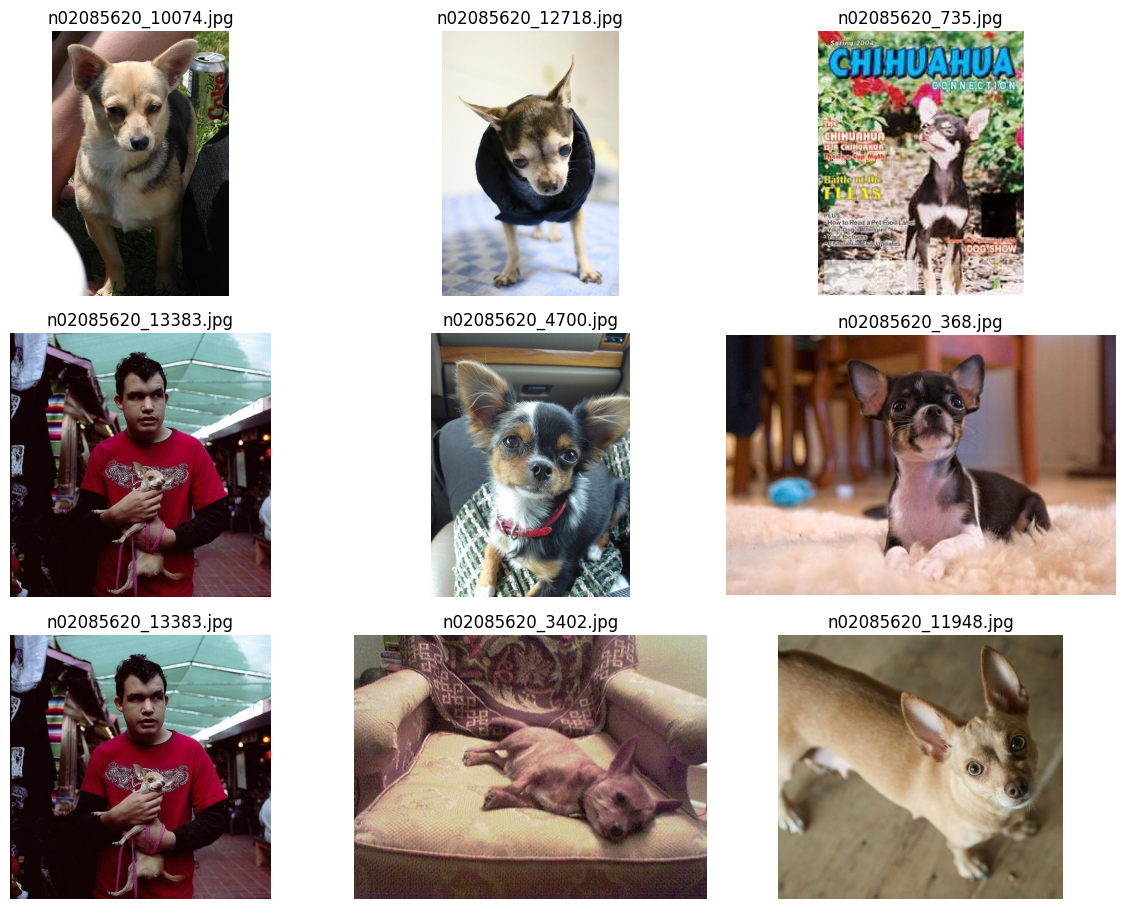

In [33]:
PATH = '/content/extracted_folder/Images/n02085620-Chihuahua/'
images = os.listdir(PATH)
print(f'There are {len(os.listdir(PATH))} pictures of dogs.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH)))
    # https://matplotlib.org/users/image_tutorial.html
    img = plt.imread(PATH + images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Insights

Check this posts:

>[Quick data explanation and EDA](https://www.kaggle.com/witold1/quick-data-explanation-and-eda) by @witold1

> [New Insights](https://www.kaggle.com/c/generative-dog-images/discussion/97863#latest-564673)

- There are pictures with more than one dog (even with  3  dogs);
- There are pictures with the dog (-s) and person (people);
- There are pictures with more than one person (even with  4  people);
- There are pictures where dogs occupy less than  1/5  of the picture;
- There are pictures with text (magazine covers, from dog shows, memes and pictures with text);
- Even wild predators included, e.g. African wild dog or Dingo, but not wolves.

**Examples**

<img src="https://i.ibb.co/cxZ3nwd/Captura-de-pantalla-de-2019-06-29-12-31-41.png" alt="Captura-de-pantalla-de-2019-06-29-12-31-41">
<img src="https://i.ibb.co/TRzg1JG/Captura-de-pantalla-de-2019-06-29-12-32-48.png" alt="Captura-de-pantalla-de-2019-06-29-12-32-48">
<img src="https://i.ibb.co/LNgrSTj/Captura-de-pantalla-de-2019-06-29-12-32-28.png" alt="Captura-de-pantalla-de-2019-06-29-12-32-28">
<img src="https://i.ibb.co/p1LBrz3/Captura-de-pantalla-de-2019-06-29-12-31-59.png" alt="Captura-de-pantalla-de-2019-06-29-12-31-59">



# Image Preprocessing
### Check: [GAN dogs starter](https://www.kaggle.com/wendykan/gan-dogs-starter)

**Initial code ...**

```
batch_size = 32
batchSize = 64
imageSize = 64

# 64x64 images!
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('../input/all-dogs/', transform=transform)

dataloader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

imgs, label = next(iter(dataloader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

```

**New data Data loader and Augmentations from [RaLSGAN dogs](https://www.kaggle.com/speedwagon/ralsgan-dogs)**

In [34]:
batch_size = 32
image_size = 64

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('/content/extracted_folder/Images/', transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

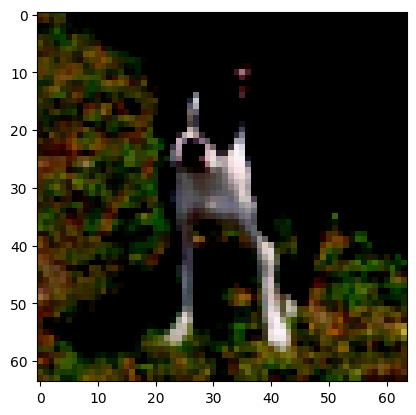

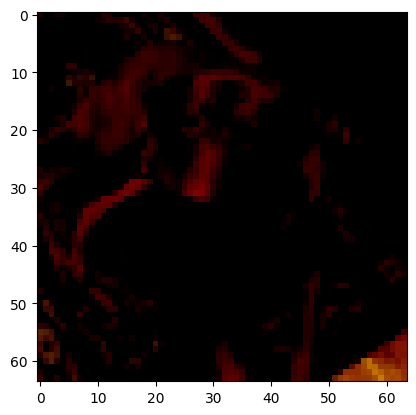

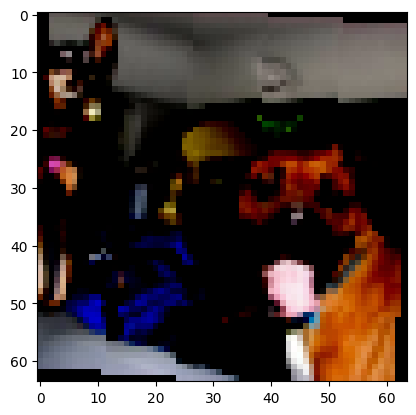

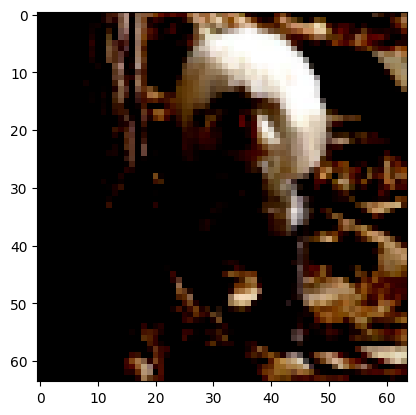

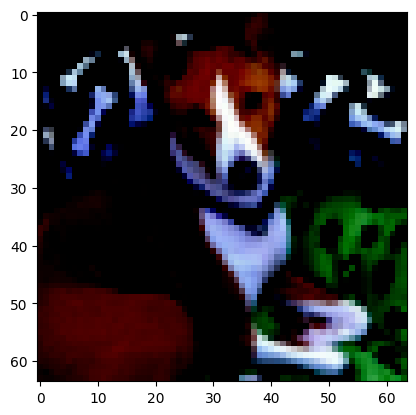

In [35]:
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

# Weights
### Defining the weights_init function

In [36]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# Generator

In [37]:
class G(nn.Module):
    def __init__(self):
        # Used to inherit the torch.nn Module
        super(G, self).__init__()
        # Meta Module - consists of different layers of Modules
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )

    def forward(self, input):
        output = self.main(input)
        return output

# Creating the generator
netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

# Discriminator

In [38]:
# Defining the discriminator
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )

    def forward(self, input):
        output = self.main(input)
        # .view(-1) = Flattens the output into 1D instead of 2D
        return output.view(-1)


# Creating the discriminator
netD = D()
netD.apply(weights_init)


D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

## Another setup

In [39]:
class Generator(nn.Module):
    def __init__(self, nz=128, channels=3):
        super(Generator, self).__init__()

        self.nz = nz
        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block

        self.model = nn.Sequential(
            *convlayer(self.nz, 1024, 4, 1, 0), # Fully connected layer via convolution.
            *convlayer(1024, 512, 4, 2, 1),
            *convlayer(512, 256, 4, 2, 1),
            *convlayer(256, 128, 4, 2, 1),
            *convlayer(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1)
        img = self.model(z)
        return img


class Discriminator(nn.Module):
    def __init__(self, channels=3):
        super(Discriminator, self).__init__()

        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *convlayer(self.channels, 32, 4, 2, 1),
            *convlayer(32, 64, 4, 2, 1),
            *convlayer(64, 128, 4, 2, 1, bn=True),
            *convlayer(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),  # FC with Conv.
        )

    def forward(self, imgs):
        logits = self.model(imgs)
        out = torch.sigmoid(logits)

        return out.view(-1, 1)

# Training

**My training baseline**

In [40]:
!mkdir results
!ls

mkdir: cannot create directory ‘results’: File exists
extracted_folder  images.tar  results  sample_data


In [41]:
EPOCH = 10 # play with me
LR = 0.001
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

This doesn't run because EPOCH = 0, change it and try ;)

In [32]:
for epoch in range(EPOCH):
    for i, data in enumerate(train_loader, 0):
        # 1st Step: Updating the weights of the neural network of the discriminator
        netD.zero_grad()

        # Training the discriminator with a real image of the dataset
        real,_ = data
        input = Variable(real)
        target = Variable(torch.ones(input.size()[0]))
        output = netD(input)
        errD_real = criterion(output, target)

        # Training the discriminator with a fake image generated by the generator
        noise = Variable(torch.randn(input.size()[0], 100, 1, 1))
        fake = netG(noise)
        target = Variable(torch.zeros(input.size()[0]))
        output = netD(fake.detach())
        errD_fake = criterion(output, target)

        # Backpropagating the total error
        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()

        # 2nd Step: Updating the weights of the neural network of the generator
        netG.zero_grad()
        target = Variable(torch.ones(input.size()[0]))
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()

        # 3rd Step: Printing the losses and saving the real images and the generated images of the minibatch every 100 steps
        print('[%d/%d][%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (epoch, EPOCH, i, len(train_loader), errD.item(), errG.item()))
        if i % 100 == 0:
            vutils.save_image(real, '%s/real_samples.png' % "./results", normalize=True)
            fake = netG(noise)
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % ("./results", epoch), normalize=True)

[0/10][0/644] Loss_D: 1.8222; Loss_G: 29.0641
[0/10][1/644] Loss_D: 3.2495; Loss_G: 24.2202
[0/10][2/644] Loss_D: 9.5541; Loss_G: 30.7990
[0/10][3/644] Loss_D: 3.8448; Loss_G: 22.5697
[0/10][4/644] Loss_D: 11.5710; Loss_G: 28.5253
[0/10][5/644] Loss_D: 1.3679; Loss_G: 24.4404
[0/10][6/644] Loss_D: 2.8009; Loss_G: 28.0141
[0/10][7/644] Loss_D: 0.5108; Loss_G: 22.5263
[0/10][8/644] Loss_D: 70.4450; Loss_G: 13.0186
[0/10][9/644] Loss_D: 95.0151; Loss_G: 0.0100


KeyboardInterrupt: 

# Best public training
- 06/29 [RaLSGAN dogs](https://www.kaggle.com/speedwagon/ralsgan-dogs) V9
- 06/29 this kernel V5
- some version of this kernel

### Parameters

In [ ]:
batch_size = 32
LR_G = 0.001
LR_D = 0.0005

beta1 = 0.5
epochs = 100

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Initialize models and optimizers

In [ ]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

**Plot Loss per EPOCH**
> plot_loss()

In [ ]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

**Show generated images**
> show_generated_img()

In [ ]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)

    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)

    plt.show()
    plt.close()

### Training Loop

[1/100][322/644] Loss_D: 1.4464 Loss_G: 0.9089 D(x): 0.4550 D(G(z)): 0.4623 / 0.3986
[1/100][644/644] Loss_D: 1.8539 Loss_G: 1.2656 D(x): 0.2156 D(G(z)): 0.3404 / 0.2714



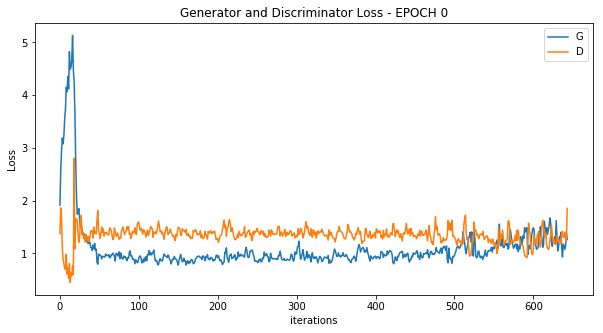

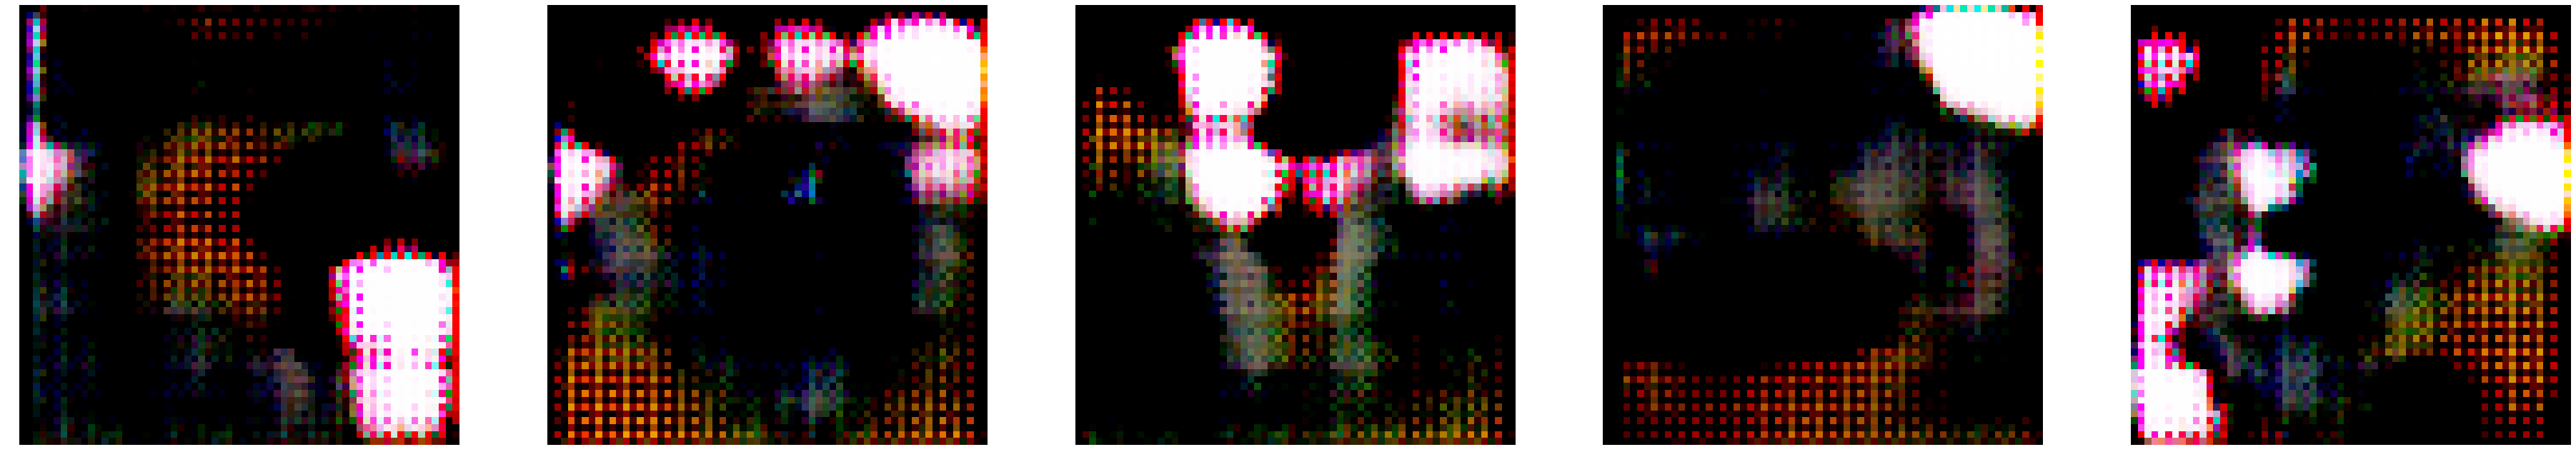

[2/100][322/644] Loss_D: 1.1829 Loss_G: 1.2849 D(x): 0.5708 D(G(z)): 0.4032 / 0.2692
[2/100][644/644] Loss_D: 1.4644 Loss_G: 1.9767 D(x): 0.4805 D(G(z)): 0.4887 / 0.1407



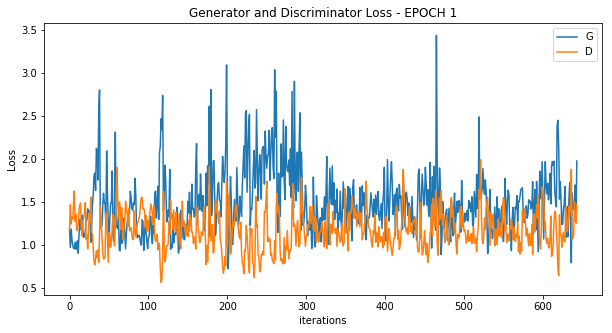

[3/100][322/644] Loss_D: 1.2908 Loss_G: 1.1204 D(x): 0.4518 D(G(z)): 0.3671 / 0.3135
[3/100][644/644] Loss_D: 1.3849 Loss_G: 1.9333 D(x): 0.4369 D(G(z)): 0.4115 / 0.1555



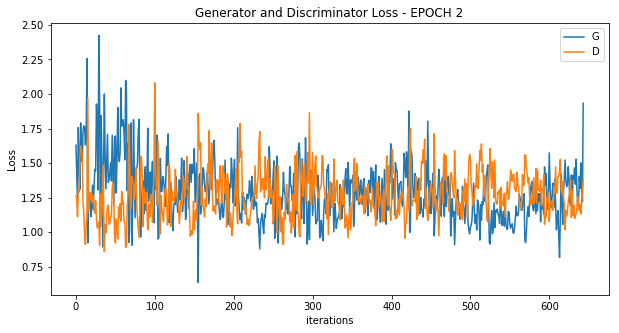

[4/100][322/644] Loss_D: 1.2747 Loss_G: 1.0840 D(x): 0.5136 D(G(z)): 0.4170 / 0.3303
[4/100][644/644] Loss_D: 1.8070 Loss_G: 1.4000 D(x): 0.3148 D(G(z)): 0.3891 / 0.2224



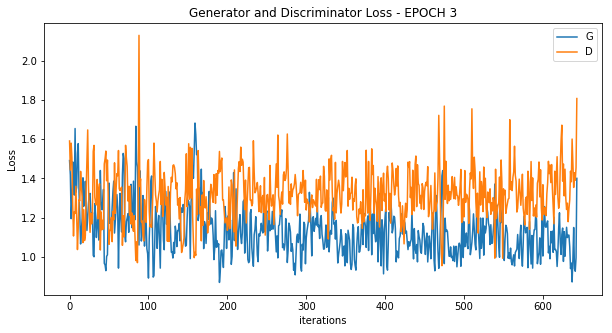

[5/100][322/644] Loss_D: 1.3839 Loss_G: 0.9736 D(x): 0.4548 D(G(z)): 0.4407 / 0.3771
[5/100][644/644] Loss_D: 1.4331 Loss_G: 1.6613 D(x): 0.4585 D(G(z)): 0.4764 / 0.1663



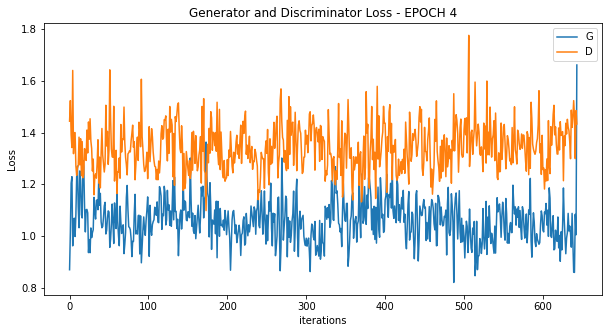

[6/100][322/644] Loss_D: 1.3452 Loss_G: 1.0830 D(x): 0.4553 D(G(z)): 0.4094 / 0.3301
[6/100][644/644] Loss_D: 1.2732 Loss_G: 1.8463 D(x): 0.6052 D(G(z)): 0.5009 / 0.1441



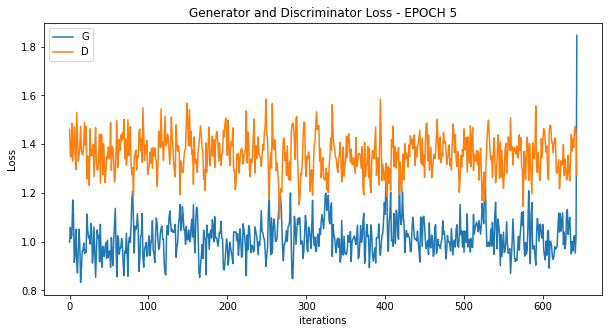

[7/100][322/644] Loss_D: 1.2966 Loss_G: 0.9851 D(x): 0.4922 D(G(z)): 0.4238 / 0.3615
[7/100][644/644] Loss_D: 1.2188 Loss_G: 1.3831 D(x): 0.4372 D(G(z)): 0.3378 / 0.2250



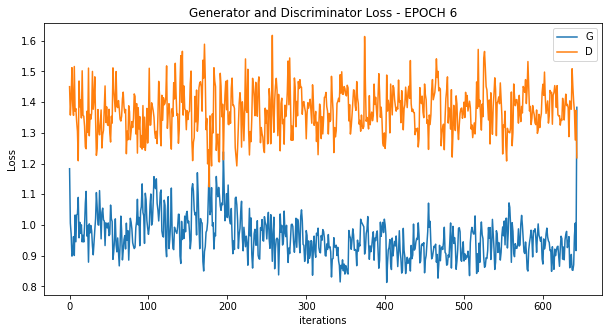

[8/100][322/644] Loss_D: 1.3432 Loss_G: 0.8930 D(x): 0.5030 D(G(z)): 0.4617 / 0.4022
[8/100][644/644] Loss_D: 1.4801 Loss_G: 1.2702 D(x): 0.4047 D(G(z)): 0.4117 / 0.2581



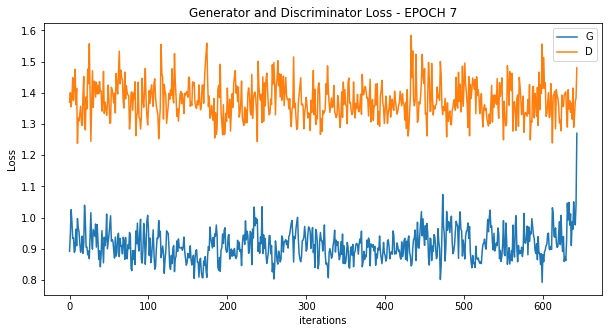

[9/100][322/644] Loss_D: 1.3100 Loss_G: 0.9835 D(x): 0.4919 D(G(z)): 0.4424 / 0.3563
[9/100][644/644] Loss_D: 1.6130 Loss_G: 1.2799 D(x): 0.3803 D(G(z)): 0.4705 / 0.2508



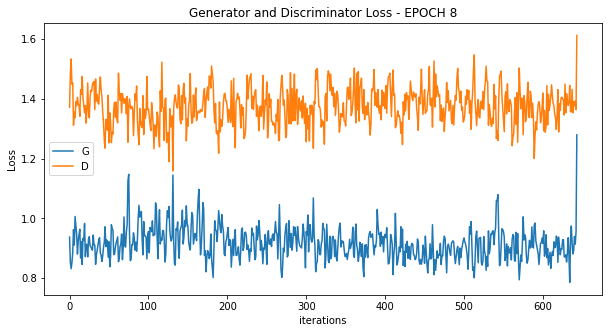

[10/100][322/644] Loss_D: 1.3648 Loss_G: 0.8486 D(x): 0.4675 D(G(z)): 0.4449 / 0.4212


In [ ]:
for epoch in range(epochs):

    start = time.time()
    for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        if (ii+1) % (len(train_loader)//2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii+1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    plot_loss (G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    if epoch % 10 == 0:
        show_generated_img()

    epoch_time.append(time.time()- start)

#             valid_image = netG(fixed_noise)

In [ ]:
print (">> average EPOCH duration = ", np.mean(epoch_time))

>> average EPOCH duration =  121.24567284107208


# Generation example

**WARNING,THIS CONTAINS IMAGES THAT MAY HURT THE SENSITIVITY OF SOME PEOPLE**

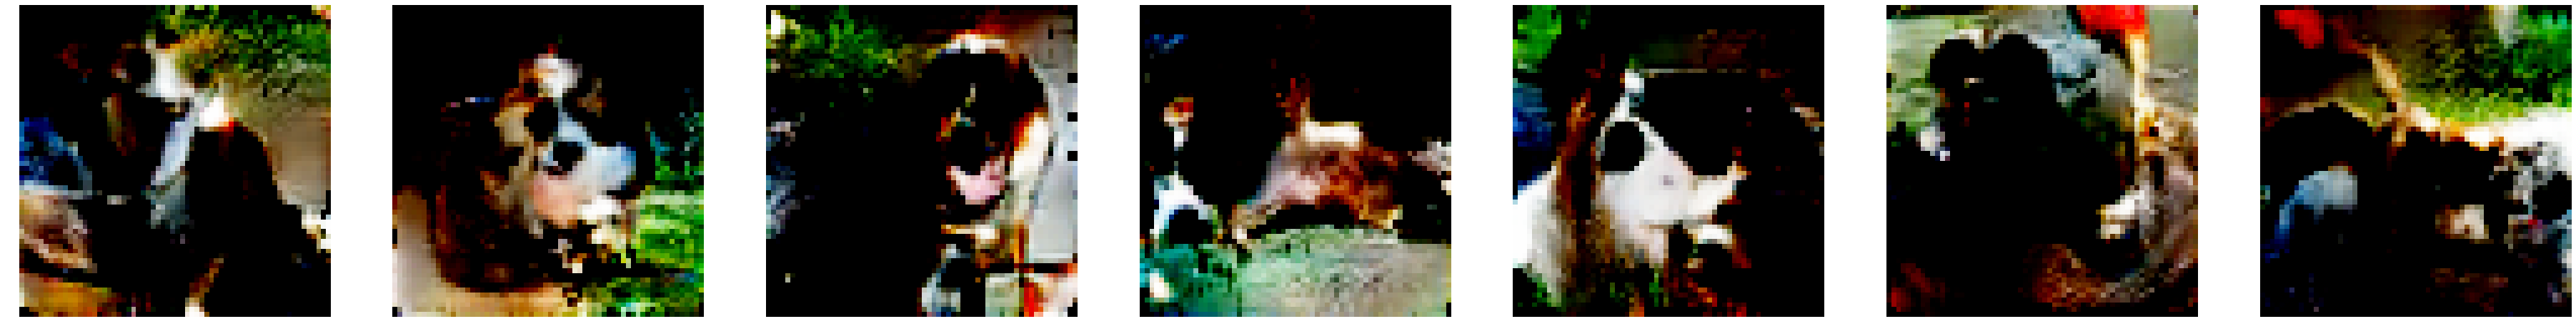

In [ ]:
show_generated_img(7)

In [ ]:
if not os.path.exists('../output_images'):
    os.mkdir('../output_images')

im_batch_size = 50
n_images=10000

for i_batch in tqdm(range(0, n_images, im_batch_size)):
    gen_z = torch.randn(im_batch_size, nz, 1, 1, device=device)
    gen_images = netG(gen_z)
    images = gen_images.to("cpu").clone().detach()
    images = images.numpy().transpose(0, 2, 3, 1)
    for i_image in range(gen_images.size(0)):
        save_image(gen_images[i_image, :, :, :], os.path.join('../output_images', f'image_{i_batch+i_image:05d}.png'))

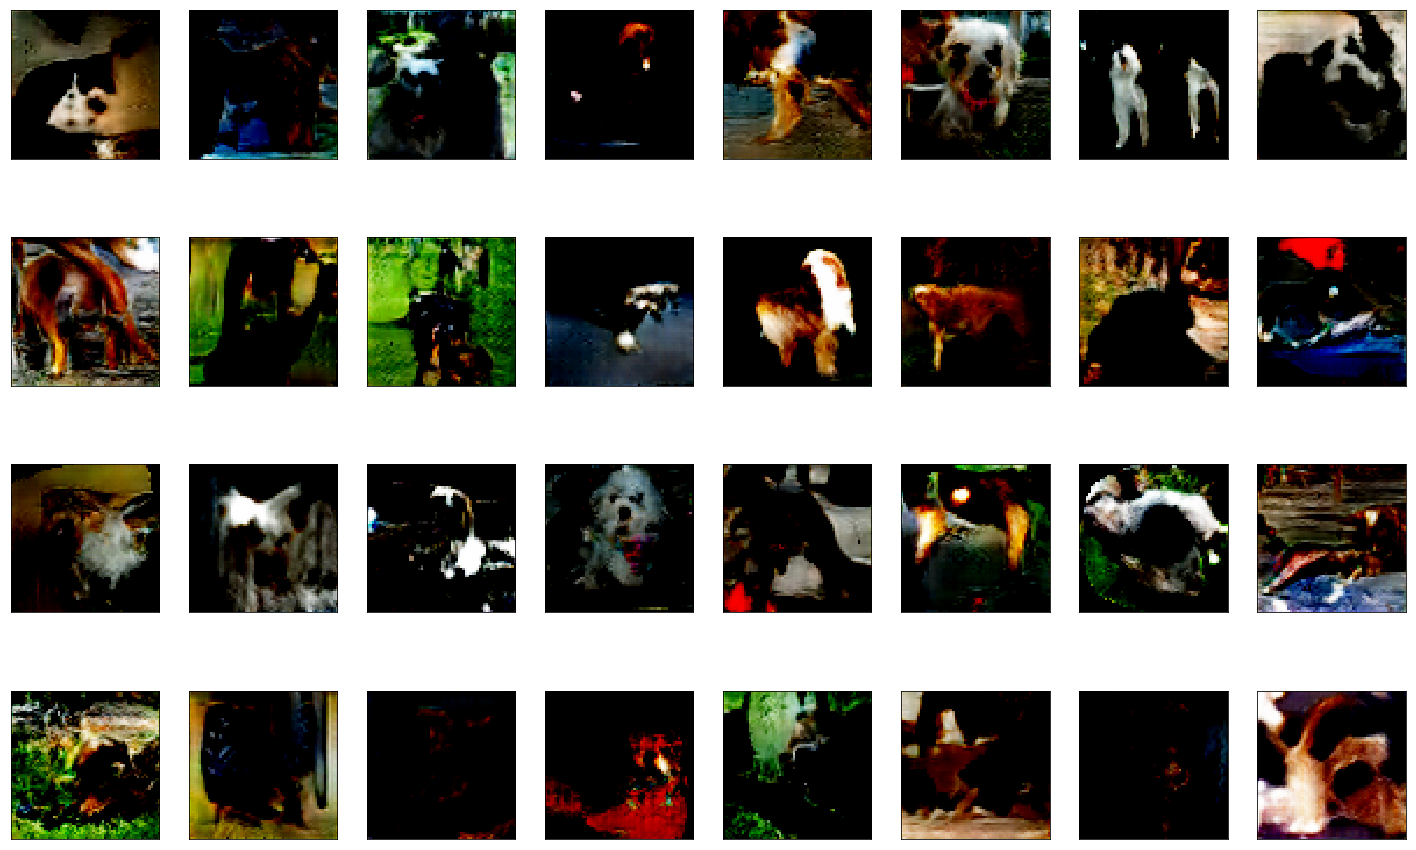

In [ ]:
fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for i, j in enumerate(images[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(j)